In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import openMindednessFunctions as omf
import seaborn as sns

In [2]:
%cd datasets/in/

c:\Users\valen\Desktop\openmindedness-gunminpol\datasets\in


In [3]:
df = pd.read_csv('OMdata.csv')
df = df.drop(labels='Unnamed: 0', axis='columns')

In [4]:
df.dataset.unique()

array(['guncontrol', 'minority', 'politics'], dtype=object)

In [5]:
df.columns

Index(['timestamp', 'node', 'dataset', 'opt', 'opt1', 'neighbors', 'opChange',
       'homophily', 'orientation', 'neighborsOps', 'error', 'estOp',
       'openMindedness', 'nactiveint', 'orientation-1', 'date'],
      dtype='object')

In [7]:
import os
import re
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
from cycler import cycler


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('mode.chained_assignment', None)

In [10]:
#rcParams default settings
"https://matplotlib.org/stable/tutorials/introductory/customizing.html"

#rcParams settings
plt.style.use('ggplot')

rcParams['font.size'] = 20
rcParams['font.family'] = 'sans-serif'
rcParams['font.style'] = 'normal'

rcParams['figure.facecolor'] = 'white'
rcParams['figure.figsize'] = (10,6)

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.transparent'] = True

navy = (56 / 256, 74 / 256, 143 / 256)
teal = (106 / 256, 197 / 256, 179 / 256)
pink = [199 / 255, 99 / 255, 150 / 255]
rcParams['axes.prop_cycle'] = cycler(color=['tab:blue', 'tab:green', 'tab:red'])

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['axes.labelsize'] = 20
rcParams['axes.labelcolor'] = 'black'
rcParams['axes.edgecolor'] = 'grey'
rcParams['axes.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['axes.titlepad'] = 4

rcParams['xtick.color'] = 'grey'
rcParams['ytick.color'] = 'grey'
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.width'] = 0
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = 0
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20

rcParams['lines.linewidth'] = 3
rcParams['lines.markersize'] = 10

rcParams['grid.color'] = 'grey'
rcParams['grid.linewidth'] = 0.1

rcParams['text.color'] = 'black'

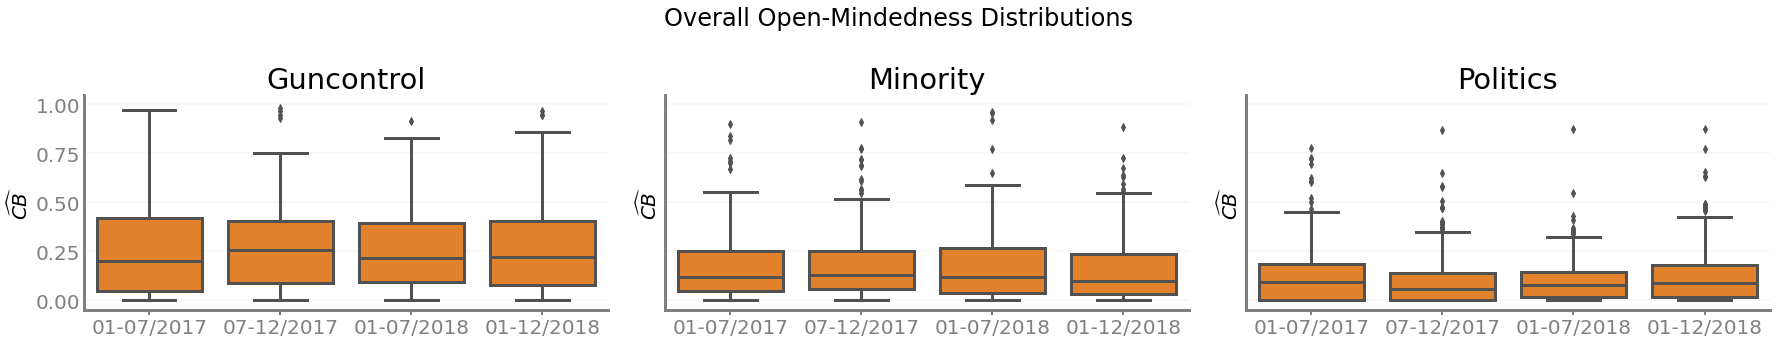

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(25,5))
for i, dataset in enumerate(sorted(df.dataset.unique())):
    data = df[df['dataset']==dataset]
    # sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
    g = sns.boxplot(x="timestamp", y="openMindedness", palette=['tab:orange'],data=data, ax=ax[i])
    g.set_xlabel("")
    g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    g.set_xticks(ticks=[0, 1, 2, 3])
    g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})
    g.set_ylim(-0.05, 1.05)
    g.set_title(dataset.capitalize())
plt.suptitle("Overall Open-Mindedness Distributions")
plt.tight_layout()
plt.show()
plt.close()
# plt.legend(loc='upper right', title='Leaning')
# g.set_xticks(ticks=[0,5,11,17])
# g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'left'})
# g.set_xlim(left=-1.5, right=19.5)

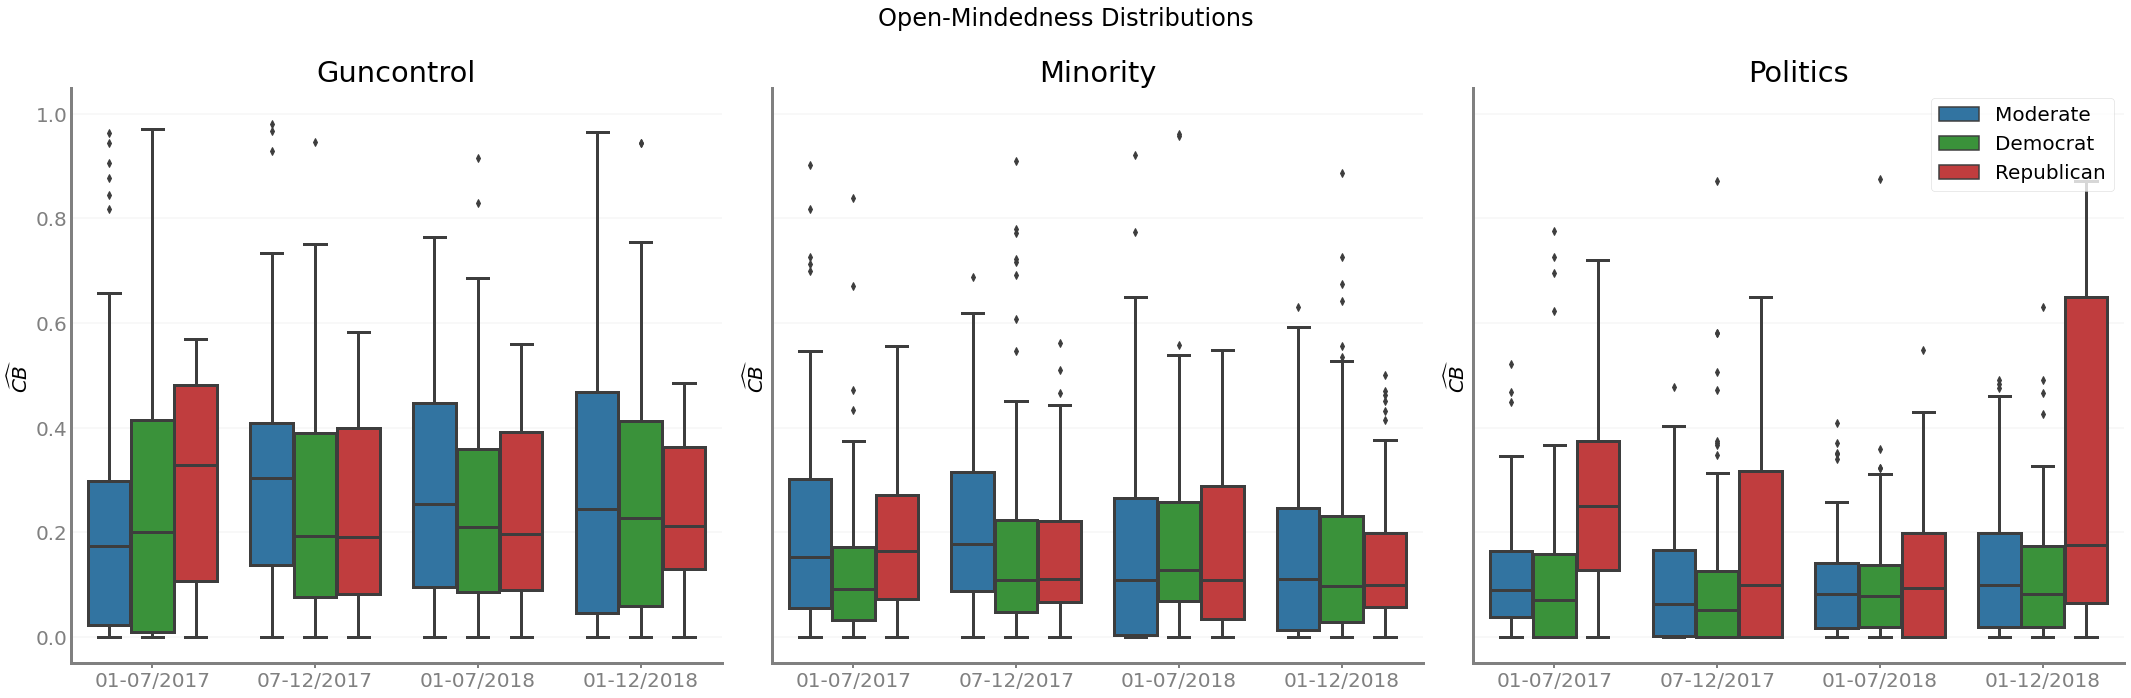

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(30,10))
for i, dataset in enumerate(sorted(df.dataset.unique())):
    data = df[df['dataset']==dataset]
    # sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
    g = sns.boxplot(x="timestamp", y="openMindedness", hue='orientation', data=data, ax=ax[i])
    g.set_xlabel("")
    g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    g.set_xticks(ticks=[0, 1, 2, 3])
    g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})
    g.set_ylim(-0.05, 1.05)
    g.set_title(dataset.capitalize())
ax[0].legend_.remove()
ax[1].legend_.remove()
ax[2].legend_.set_title("Leaning")
ax[2].legend(loc='upper right', fontsize=20)

plt.suptitle("Open-Mindedness Distributions")
plt.tight_layout()
plt.show()
plt.close()
# g.set_xticks(ticks=[0,5,11,17])
# g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'left'})
# g.set_xlim(left=-1.5, right=19.5)

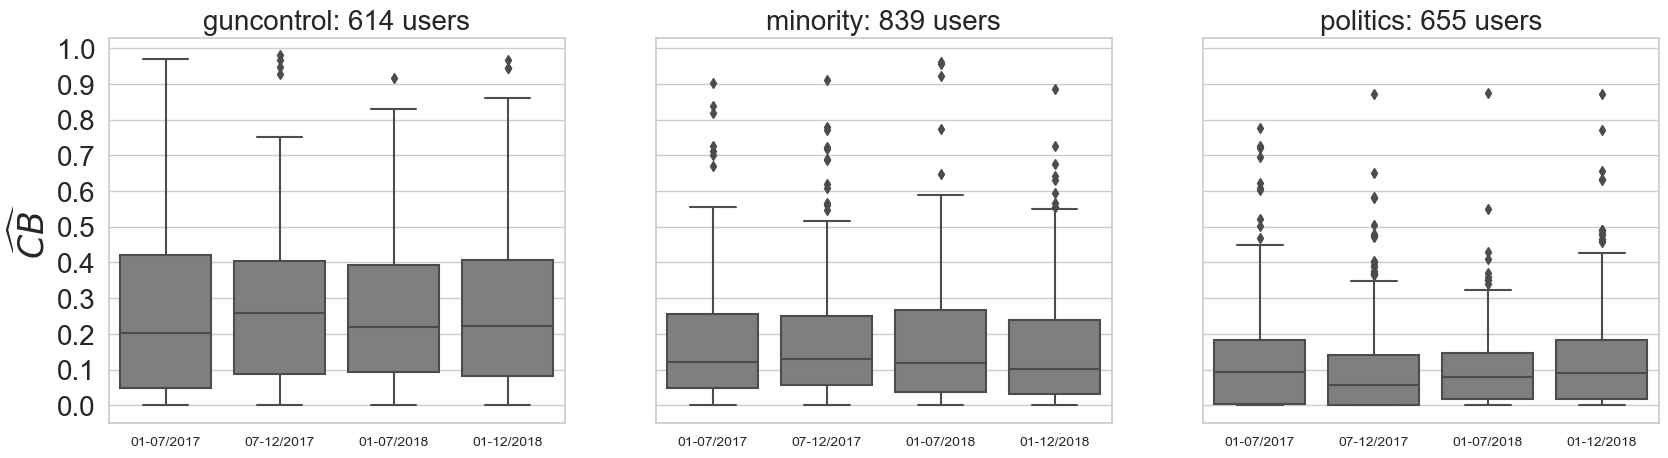

In [52]:
sns.set_style("whitegrid", rc={'figure.dpi':600, 'axes.xmargin': 0.15})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5), sharey=True, sharex=True)
datasets = ['guncontrol', 'minority', 'politics']
for i in range(3):
    data = df[df['dataset']==datasets[i]]
    g = sns.boxplot(x="timestamp", y="openMindedness", data=data, palette=['tab:grey'], ax=axes[i])
    g.set_xticks(ticks=[0, 1, 2, 3])
    g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'}, fontsize=10)
    g.set_yticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    g.tick_params(axis='y', labelsize=20)
    g.set_xlabel("")
    g.set_title(f'{datasets[i]}: {len(data)} users', fontsize=20)
    if i == 0:
        g.set_ylabel(r"$\widehat{CB}$", fontsize = 25)
    else:
        g.set_ylabel("")
    # g.set_ylabel(r"$\widehat{CB}$", fontsize = 25)

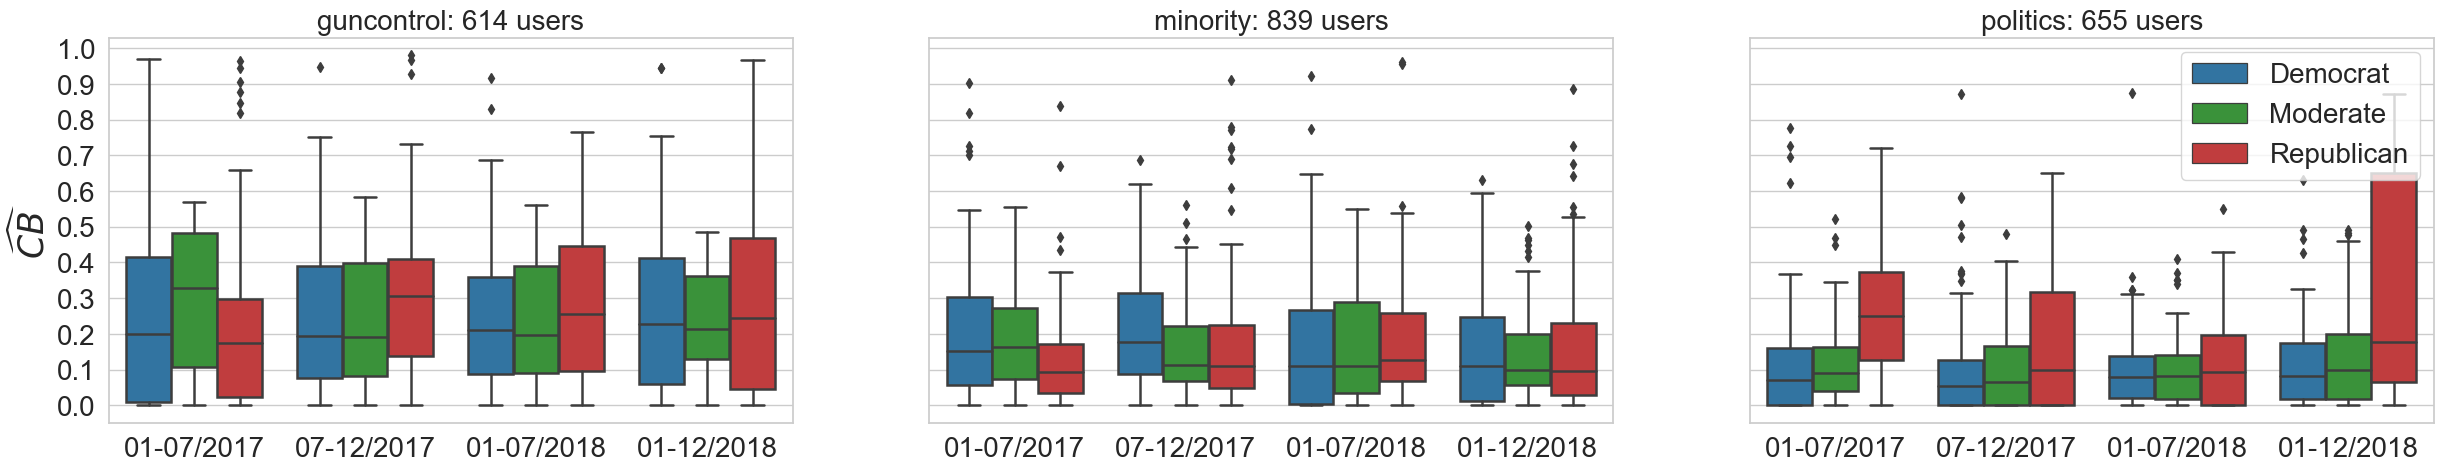

In [56]:
palette = {
    'Democrat':'tab:blue',
    'Moderate':'tab:green',
    'Republican':'tab:red'
}

sns.set_style("whitegrid", rc={'figure.dpi':600, 'axes.xmargin': 0.15})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,5), sharey=True, sharex=True)
datasets = ['guncontrol', 'minority', 'politics']
for i in range(3):
    data = df[df['dataset']==datasets[i]]
    g = sns.boxplot(x="timestamp", y="openMindedness", data=data, hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, linewidth=1.8, ax=axes[i])
    g.set_xticks(ticks=[0, 1, 2, 3])
    g.set_yticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'}, fontsize=20)
    g.tick_params(axis='y', labelsize=20)
    g.set_xlabel("")
    g.set_title(f'{datasets[i]}: {len(data)} users', fontsize=20)
    if i == 0:
        g.set_ylabel(r"$\widehat{CB}$", fontsize = 25)
    else:
        g.set_ylabel("")
    if i == 2:
        g.legend(loc='upper right', fontsize=20)
    else:
        g.get_legend().remove()
    # g.set_ylabel(r"$\widehat{CB}$", fontsize = 25)

Text(0, 0.5, '$\\widehat{CB}$')

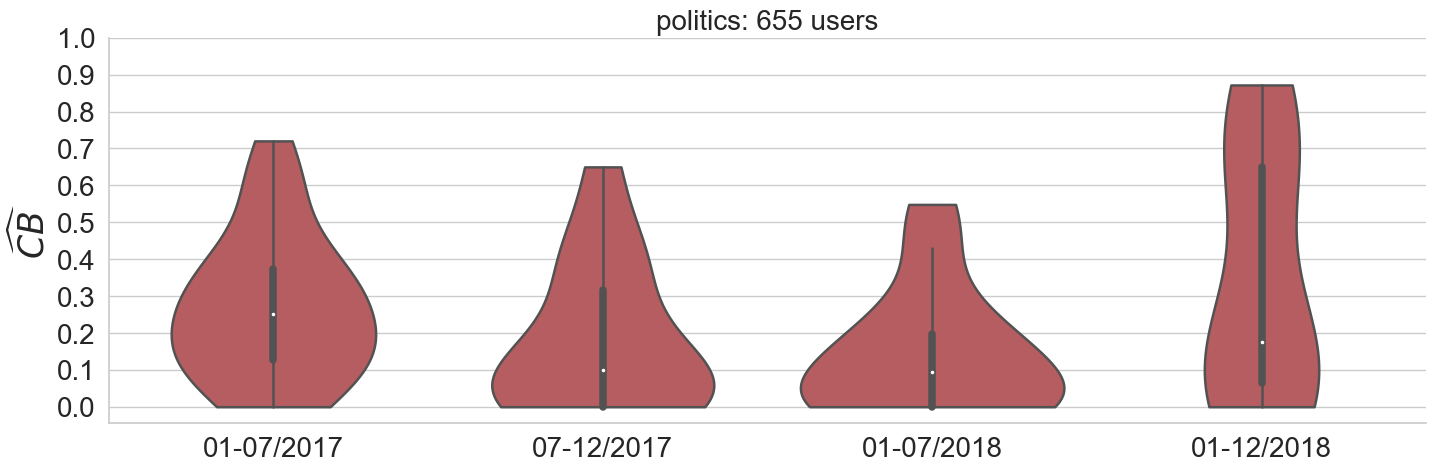

In [64]:
sns.set()
sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
fig, ax = plt.subplots(figsize=(17,5))
g = sns.violinplot(x="timestamp", y="openMindedness", data=data[data['orientation']=='Republican'], palette=['r'], alpha=0.6, linewidth=1.8, ax=ax, cut = 0)
g.set_xticks(ticks=[0, 1, 2, 3])
g.set_yticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'}, fontsize=20)
g.tick_params(axis='y', labelsize=20)
g.set_xlabel("")
g.set_title(f'{datasets[i]}: {len(data)} users', fontsize=20)
g.set_ylabel(r"$\widehat{CB}$", fontsize = 25)
# g.set_xticks(ticks=[0,5,11,17])
# g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'center'})
# g.set_xlim(left=-1.5, right=19.5)

Text(0, 0.5, '$\\widehat{CB}$')

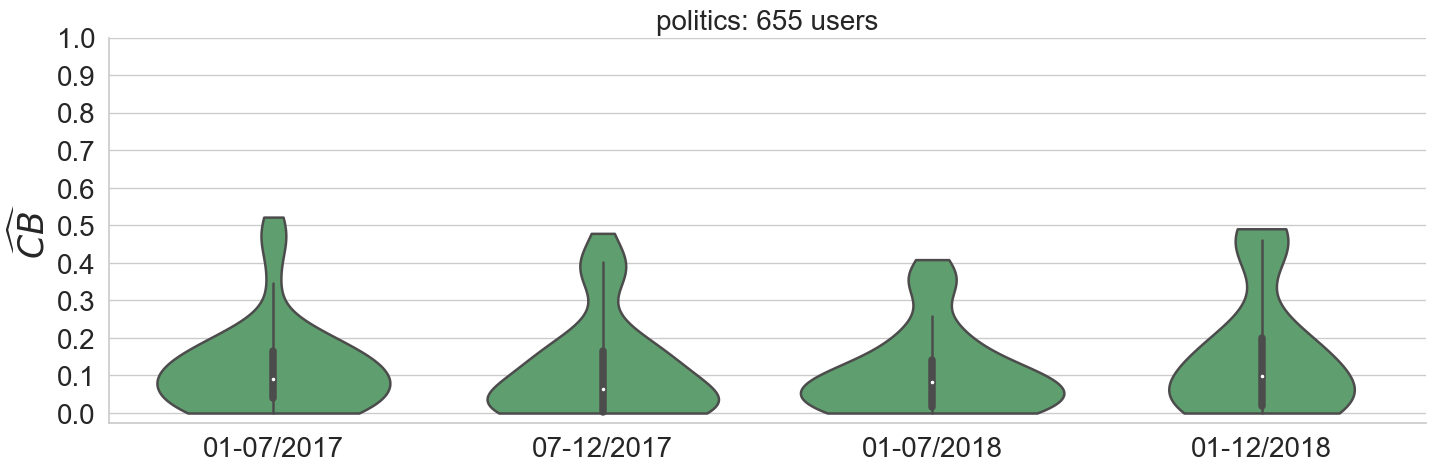

In [65]:
sns.set()
sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
fig, ax = plt.subplots(figsize=(17,5))
g = sns.violinplot(x="timestamp", y="openMindedness", data=data[data['orientation']=='Moderate'], palette=['g'], alpha=0.6, linewidth=1.8, ax=ax, cut = 0)
g.set_xticks(ticks=[0, 1, 2, 3])
g.set_yticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'}, fontsize=20)
g.tick_params(axis='y', labelsize=20)
g.set_xlabel("")
g.set_title(f'{datasets[i]}: {len(data)} users', fontsize=20)
g.set_ylabel(r"$\widehat{CB}$", fontsize = 25)
# g.set_xticks(ticks=[0,5,11,17])
# g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'center'})
# g.set_xlim(left=-1.5, right=19.5)

Text(0, 0.5, '$\\widehat{CB}$')

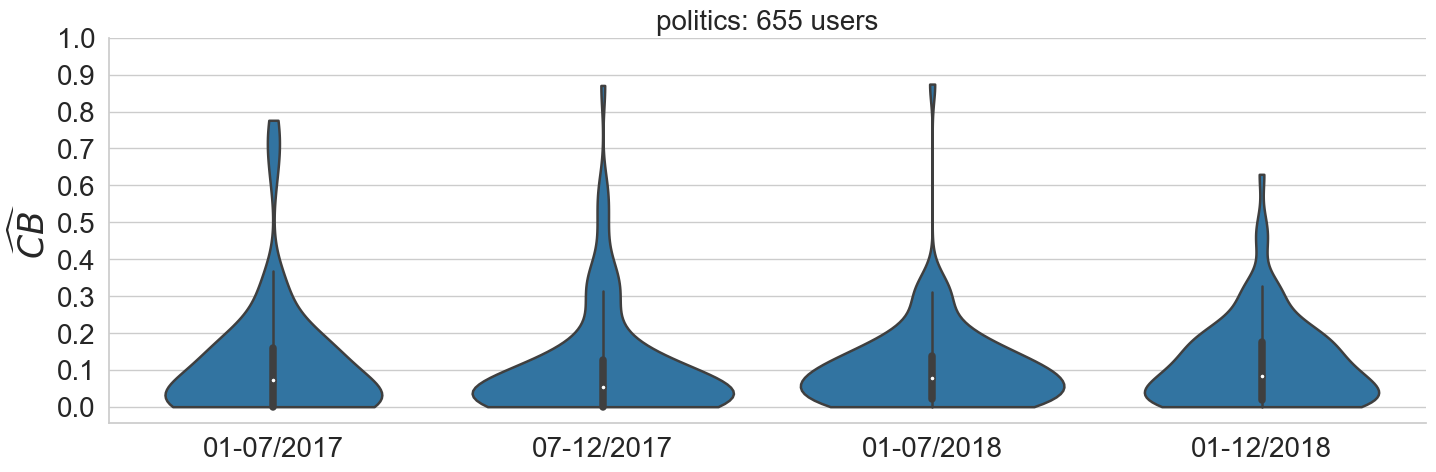

In [66]:
sns.set()
sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
fig, ax = plt.subplots(figsize=(17,5))
g = sns.violinplot(x="timestamp", y="openMindedness", data=data[data['orientation']=='Democrat'], palette=['tab:blue'], alpha=0.6, linewidth=1.8, ax=ax, cut = 0)
g.set_xticks(ticks=[0, 1, 2, 3])
g.set_yticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'}, fontsize=20)
g.tick_params(axis='y', labelsize=20)
g.set_xlabel("")
g.set_title(f'{datasets[i]}: {len(data)} users', fontsize=20)
g.set_ylabel(r"$\widehat{CB}$", fontsize = 25)
# g.set_xticks(ticks=[0,5,11,17])
# g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'center'})
# g.set_xlim(left=-1.5, right=19.5)

Text(0, 0.5, '$\\widehat{CB}$')

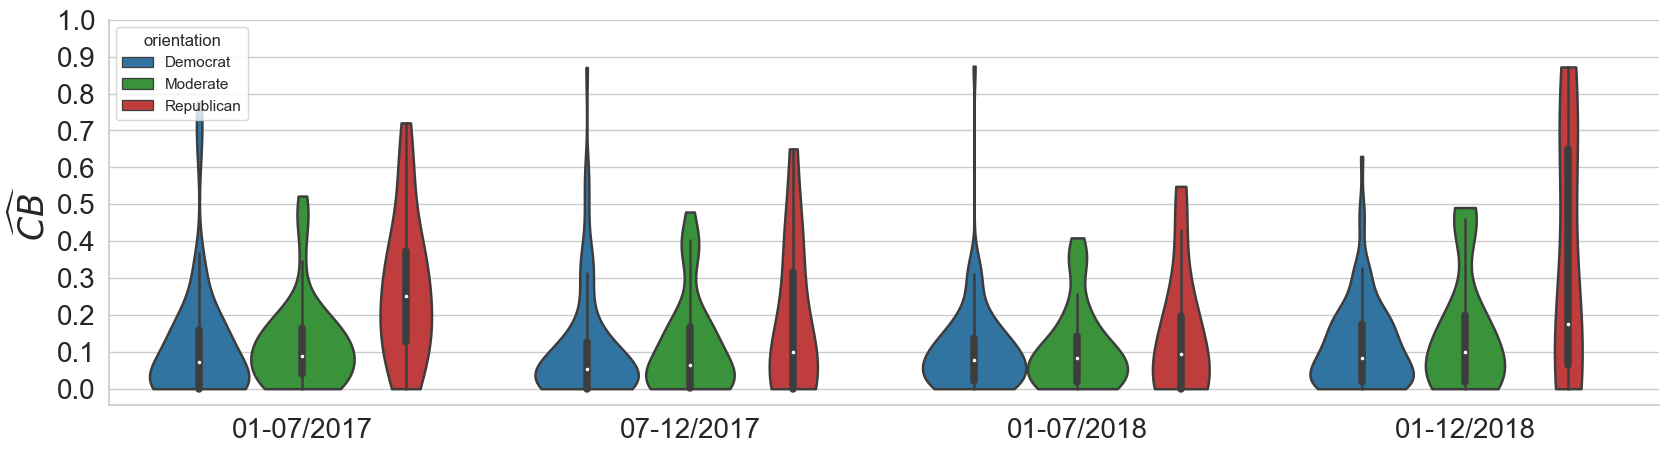

In [71]:
sns.set()
sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
fig, ax = plt.subplots(figsize=(20,5))
g = sns.violinplot(x="timestamp", y="openMindedness", data=df[df['dataset']=='politics'], hue='orientation', palette=['tab:blue', 'tab:green', 'tab:red'], hue_order = ['Democrat', 'Moderate', 'Republican'], alpha=0.6, linewidth=1.8, ax=ax, cut = 0, common_norm = False)
g.set_xticks(ticks=[0, 1, 2, 3])
g.set_yticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'}, fontsize=20)
g.tick_params(axis='y', labelsize=20)
g.set_xlabel("")
g.set_ylabel(r"$\widehat{CB}$", fontsize = 25)
# g.set_xticks(ticks=[0,5,11,17])
# g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'center'})
# g.set_xlim(left=-1.5, right=19.5)

In [14]:
print(min(df.openMindedness))
print(max(df.openMindedness))

0.0
0.980148568


In [15]:
import numpy as np
labels=np.array([['01-07/2017', '07-12/2017'], ['01-07/2018', '01-12/2018']])

In [73]:
    data = df[df['dataset']=="politics"]


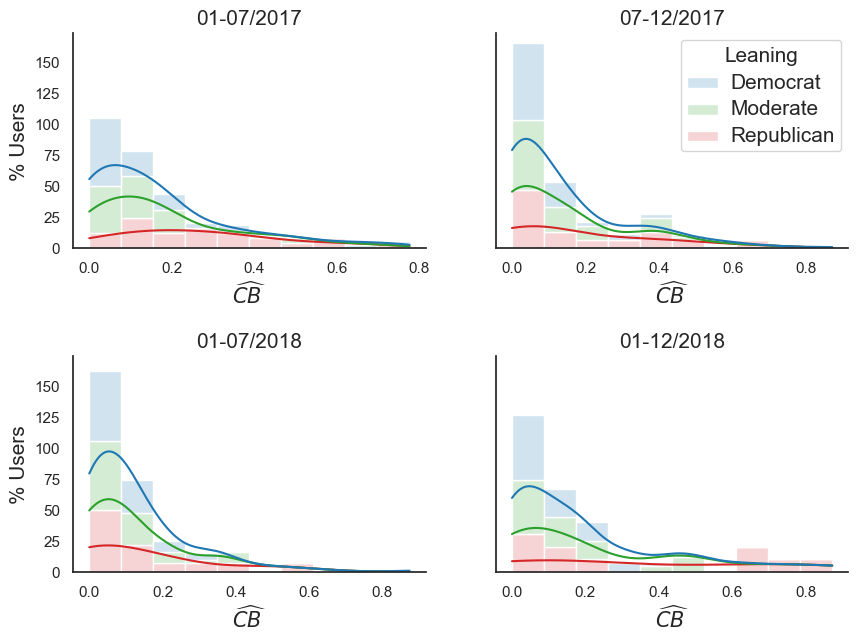

In [74]:
import seaborn as sns
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharey=True)
i = 0
j = 0
for timestamp in list(df.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.histplot(data=tmp, x='openMindedness', hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], bins=10, stat='percent', palette=palette, ax=axes[i, j], alpha=0.2, common_norm=False, fill=True, kde=True, multiple="stack")
    g.set_ylabel("% Users", fontsize = 15)
    g.set_xlabel(r"$\widehat{CB}$", fontsize = 15)
    g.set_title(f'{labels[i,j]}', fontsize = 15)
#     g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.5)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()


# Statistical tests

In [17]:
cols = pd.MultiIndex.from_tuples([("Dem vs. Rep", "ks-stat"), 
                                  ("Dem vs. Neutr", "ks-stat"), 
                                  ("Rep vs. Neutr", "ks-stat"),
                                  ("Dem vs. Rep", "p-value"), 
                                  ("Dem vs. Neutr", "p-value"), 
                                  ("Rep vs. Neutr", "p-value")])
timestamps = [(time) for time in list(data.timestamp.unique())]
multi_index = pd.Index(timestamps)
stattest_df = pd.DataFrame(columns=cols,index=multi_index)

In [18]:
from scipy.stats import ks_2samp
for timestamp in list(data.timestamp.unique()):
    # to_append = []
    # print(timestamp)
    tmp = data[data['timestamp']==timestamp]
    tmp = tmp[['openMindedness','orientation']]
    leanings = list(tmp.orientation.unique())
    d_data = {grp:tmp['openMindedness'][tmp.orientation == grp] for grp in leanings}
    stat, p = ks_2samp(d_data['Democrat'], d_data['Republican'], alternative='two-sided', mode='auto')
    alpha = 0.05
    print(f'Comparing Democrat and Moderate distribution at time {timestamp}')
    print('Statistics=%.10f, p=%.20f' % (stat, p))
    stattest_df.loc[timestamp][('Dem vs. Rep', 'ks-stat')] = stat
    stattest_df.loc[timestamp][('Dem vs. Rep', 'p-value')] = p
    # to_append.append(stat, p)
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    stat, p = ks_2samp(d_data['Democrat'], d_data['Moderate'], alternative='two-sided', mode='auto')
    alpha = 0.05
    print(f'Comparing Democrat and Moderate distribution at time {timestamp}')
    print('Statistics=%.10f, p=%.20f' % (stat, p))
    stattest_df.loc[timestamp][('Dem vs. Neutr', 'ks-stat')] = stat
    stattest_df.loc[timestamp][('Dem vs. Neutr', 'p-value')] = p
    # to_append.append(stat, p)
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    stat, p = ks_2samp(d_data['Republican'], d_data['Moderate'], alternative='two-sided', mode='auto')
    alpha = 0.05
    print(f'Comparing Republican and Moderate distribution at time {timestamp}')
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    stattest_df.loc[timestamp][('Rep vs. Neutr', 'ks-stat')] = stat
    stattest_df.loc[timestamp][('Rep vs. Neutr', 'p-value')] = p
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    # data.append(to_append)
    

Comparing Democrat and Moderate distribution at time 1
Statistics=0.4577777778, p=0.00030799195262964929
Comparing Democrat and Moderate distribution at time 1
Statistics=0.2104018913, p=0.10897414345617151277
Same distributions (fail to reject H0)
Comparing Republican and Moderate distribution at time 1
Statistics=0.454, p=0.001
Comparing Democrat and Moderate distribution at time 2
Statistics=0.2515723270, p=0.31747343317370135818
Same distributions (fail to reject H0)
Comparing Democrat and Moderate distribution at time 2
Statistics=0.1517637408, p=0.40223641926617514919
Same distributions (fail to reject H0)
Comparing Republican and Moderate distribution at time 2
Statistics=0.226, p=0.535
Same distributions (fail to reject H0)
Comparing Democrat and Moderate distribution at time 3
Statistics=0.2305516266, p=0.45783881792757030738
Same distributions (fail to reject H0)
Comparing Democrat and Moderate distribution at time 3
Statistics=0.0865809985, p=0.94700384303234919070
Same dist

In [19]:
stattest_df.to_csv('statistical_tests.csv')

In [20]:
stattest_df

,Dem vs. Rep,Dem vs. Neutr,Rep vs. Neutr,Dem vs. Rep,Dem vs. Neutr,Rep vs. Neutr
,ks-stat,ks-stat,ks-stat,p-value,p-value,p-value
1,0.457778,0.210402,0.453617,0.000307992,0.108974,0.00142758
2,0.251572,0.151764,0.226087,0.317473,0.402236,0.53507
3,0.230552,0.086581,0.215805,0.457839,0.947004,0.61209
4,0.4,0.135333,0.4,0.075774,0.583546,0.115054


In [21]:
from scipy.stats import ks_2samp
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    tmp = tmp[['openMindedness','orientation']]
    leanings = list(tmp.orientation.unique())
    d_data = {grp:tmp['openMindedness'][tmp.orientation == grp] for grp in leanings}
    stat, p = ks_2samp(d_data['Democrat'], d_data['Republican'], alternative='less', mode='auto')
    alpha = 0.05
    if p > alpha:
        print(f'Comparing Republican and Moderate distribution at time {timestamp}')
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        print('Same distributions (fail to reject H0)')
    stat, p = ks_2samp(d_data['Democrat'], d_data['Moderate'], alternative='less', mode='auto')
    alpha = 0.05
    if p > alpha:
        print(f'Comparing Republican and Moderate distribution at time {timestamp}')
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        print('Same distributions (fail to reject H0)')
    stat, p = ks_2samp(d_data['Republican'], d_data['Moderate'], alternative='less', mode='auto')
    alpha = 0.05
    if p > alpha:
        print(f'Comparing Republican and Moderate distribution at time {timestamp}')
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        print('Same distributions (fail to reject H0)')

Comparing Republican and Moderate distribution at time 1
Statistics=0.022, p=0.967
Same distributions (fail to reject H0)
Comparing Republican and Moderate distribution at time 1
Statistics=0.048, p=0.830
Same distributions (fail to reject H0)
Comparing Republican and Moderate distribution at time 2
Statistics=0.069, p=0.831
Same distributions (fail to reject H0)
Comparing Republican and Moderate distribution at time 2
Statistics=0.038, p=0.886
Same distributions (fail to reject H0)
Comparing Republican and Moderate distribution at time 2
Statistics=0.226, p=0.272
Same distributions (fail to reject H0)
Comparing Republican and Moderate distribution at time 3
Statistics=0.231, p=0.231
Same distributions (fail to reject H0)
Comparing Republican and Moderate distribution at time 3
Statistics=0.067, p=0.709
Same distributions (fail to reject H0)
Comparing Republican and Moderate distribution at time 3
Statistics=0.202, p=0.359
Same distributions (fail to reject H0)
Comparing Republican and

# Analisi stabilità OpenMindedness

### Standard deviation

In [22]:
grouped = data.groupby(['node'], as_index=False).agg({'openMindedness':['mean', 'std']})
grouped = grouped.dropna(subset=[('openMindedness', 'std')])
grouped.reset_index()
grouped.head()

node openMindedness          
                 mean       std
3  654       0.090043  0.063490
4  671       0.141912  0.088022
5  731       0.116884  0.050830
6  762       0.218766  0.043593
9  849       0.076063  0.070600

In [23]:
newdf = pd.DataFrame()
newdf['node'] = grouped[(   'node',     '')]
newdf['mean_eps'] = grouped[('openMindedness', 'mean')]
newdf['mean_std'] = grouped[('openMindedness', 'std')]
newdf.head()

,node,mean_eps,mean_std
3,654,0.090043,0.063490
4,671,0.141912,0.088022
5,731,0.116884,0.050830
6,762,0.218766,0.043593
9,849,0.076063,0.070600


Text(0.5, 0, '$\\widehat{CB}$ user-level standard deviation')

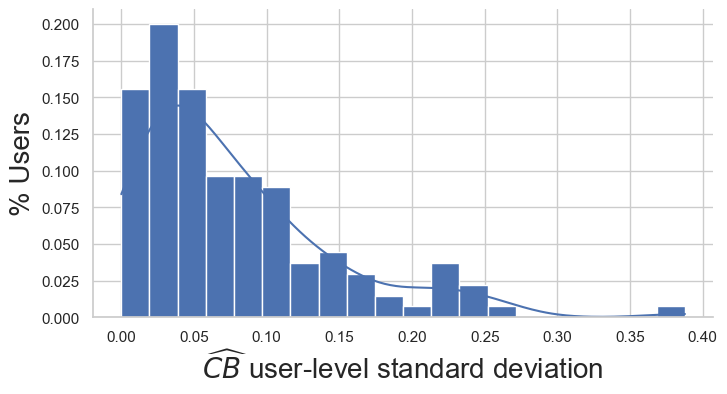

In [24]:
sns.set_style("whitegrid", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15})
fig, ax = plt.subplots(figsize=(8,4))
g = sns.histplot(data=newdf, x='mean_std', bins=20, kde=True, ax=ax, alpha=1.0, stat='probability')
g.set_ylabel("% Users", fontsize = 20)
g.set_xlabel(r"$\widehat{CB}$ user-level standard deviation", fontsize = 20)

# Distributions

Text(0, 0.5, 'Opinion (t)')

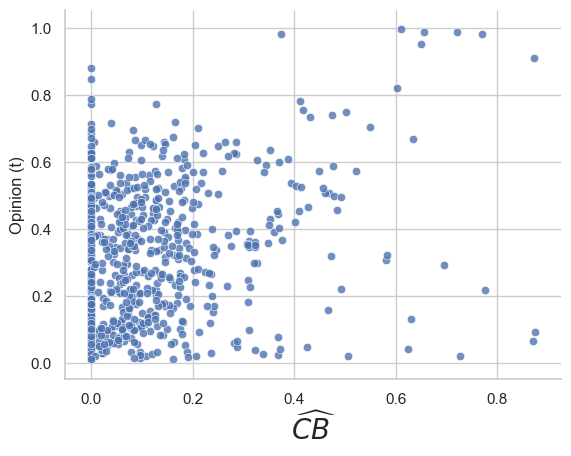

In [25]:
g = sns.scatterplot(data=data, x='openMindedness', y='opt', alpha=0.8, color='b')
g.set_xlabel(r"$\widehat{CB}$", fontsize = 20)
g.set_ylabel("Opinion (t)")

Text(0, 0.5, 'Opinion (t+1)')

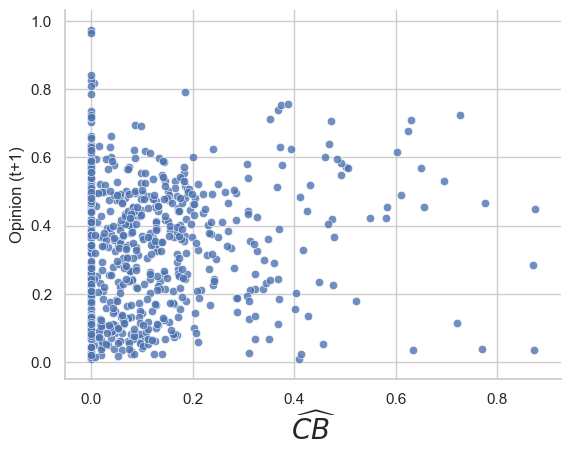

In [26]:
g = sns.scatterplot(data=data, x='openMindedness', y='opt1', alpha=0.8, color='b')
g.set_xlabel(r"$\widehat{CB}$", fontsize = 20)
g.set_ylabel("Opinion (t+1)")

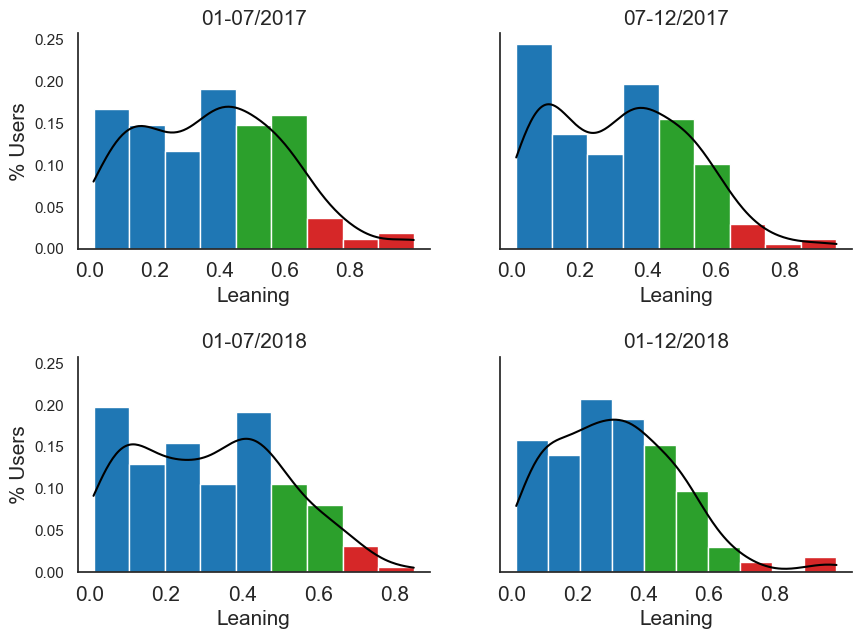

In [27]:
import seaborn as sns
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    # g = sns.histplot(data=tmp, x='opt', kde=True, bins=30, hue='orientation', palette=palette, alpha=0.2, ax=axes[i, j], stat='probability', common_norm=False)
    g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins='auto', ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel("% Users", fontsize = 15)
    g.set_xlabel(r"Leaning", fontsize = 15)
    g.set_title(f'{labels[i,j]}', fontsize = 15)
    g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    for rectangle in g.patches:
        if rectangle.get_x() < 0.4:
            rectangle.set_facecolor('tab:blue')
        elif rectangle.get_x() > 0.6:
            rectangle.set_facecolor('tab:red')
        else:
            rectangle.set_facecolor('tab:green')
    plt.subplots_adjust(hspace=0.5)

    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()

## Error distribution log scale

In [28]:
data.columns

Index(['timestamp', 'node', 'dataset', 'opt', 'opt1', 'neighbors', 'opChange',
       'homophily', 'orientation', 'neighborsOps', 'error', 'estOp',
       'openMindedness', 'nactiveint', 'orientation-1', 'date'],
      dtype='object')

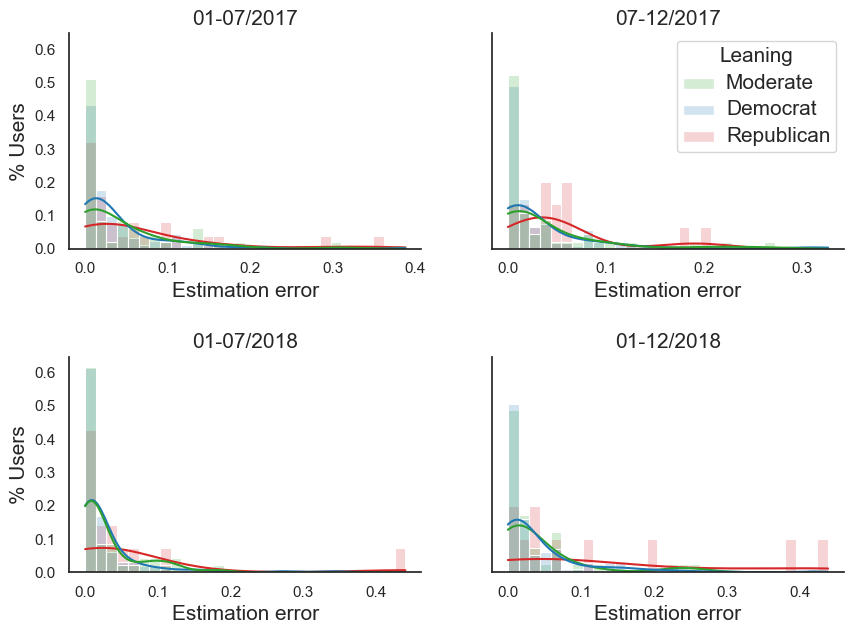

In [29]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.histplot(data=tmp, x='error', kde=True, bins=30, hue='orientation', palette=palette, alpha=0.2, ax=axes[i, j], stat='probability', common_norm=False)
    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel("% Users", fontsize = 15)
    g.set_xlabel(r"Estimation error", fontsize = 15)
    g.set_title(f'{labels[i,j]}', fontsize = 15)
#     g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.5)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()

## Error logscale distribution

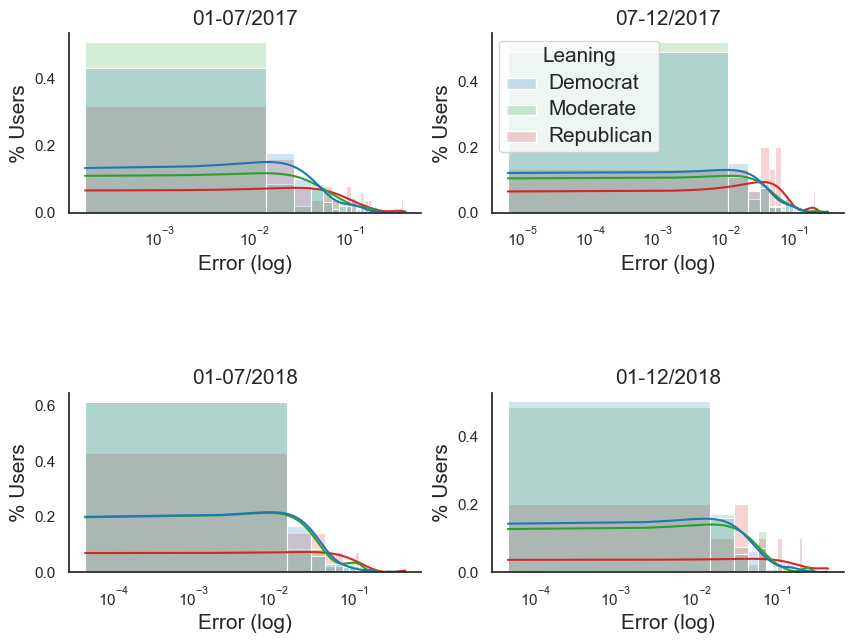

In [30]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
i = 0
j = 0

for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.histplot(data=tmp, x='error', kde=True, bins=30, hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, alpha=0.2, ax=axes[i, j], stat='probability', common_norm=False)
    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel("% Users", fontsize = 15)
    g.set_xlabel(r"Error (log)", fontsize = 15)
    g.set_title(f'{labels[i,j]}', fontsize = 15)
    g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=1.0)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()

# Mean values and standard deviations

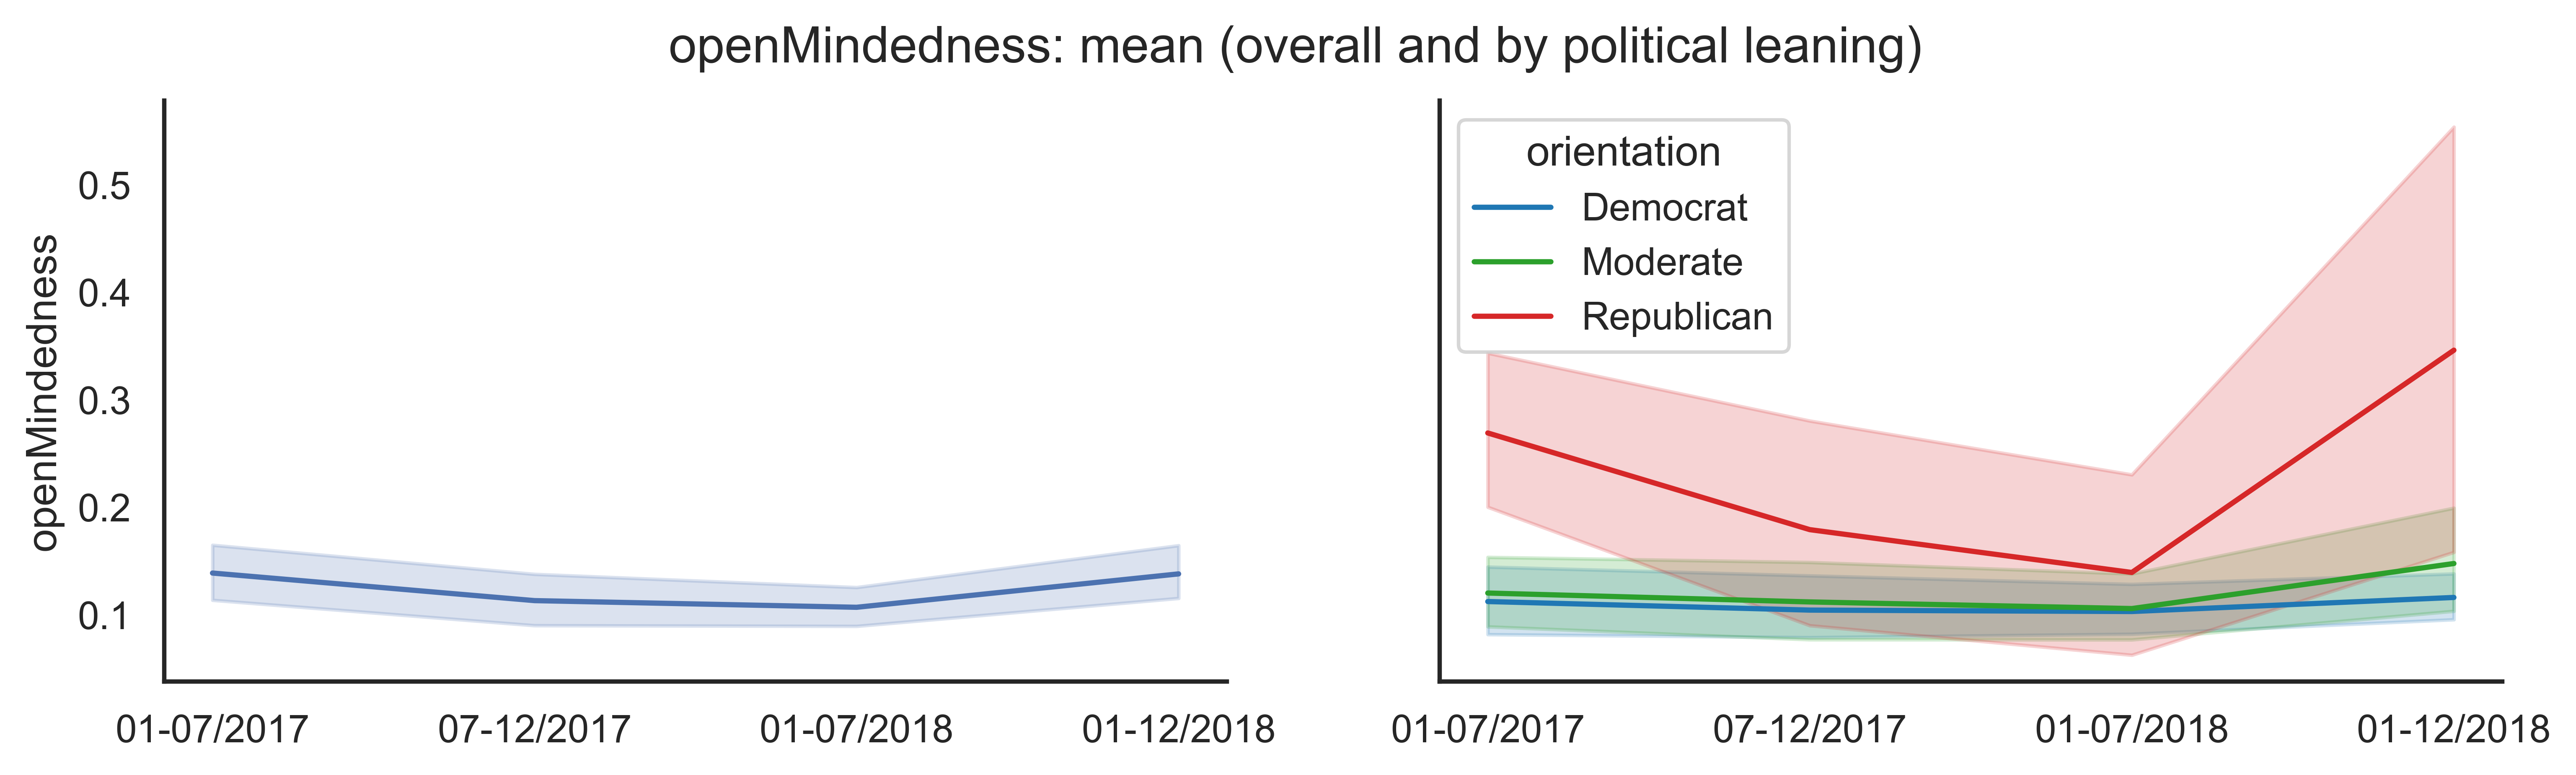

In [31]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
for attribute in ['openMindedness']:
    fig, axes = plt.subplots(figsize=(12, 3), dpi=600, nrows=1, ncols=2, sharey = True)

    f = sns.lineplot(x="timestamp", y=attribute, data=data, ax=axes[0])
#     f.set_xticks(ticks=[0,5,11,17])
#     f.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'right'})
#     f.set_xlim(left=-1.5, right=23.5)
    f.set_xlabel("")
    f.set_xticks(ticks=[1, 2, 3, 4])
    f.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})

    g = sns.lineplot(x="timestamp", y=attribute, data=data, hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], ax = axes[1], palette=palette)
#     g.set_xticks(ticks=[0,5,11,17])
#     g.set_xticklabels(labels=['05-06/2018', '10-11/2018', '04-05/2019', '10-11/2019'], fontdict={'horizontalalignment': 'right'})
#     g.set_xlim(left=-1.5, right=23.5)
#     g.set_ylim(bottom=0.0, top=1.0)
    g.set_xlabel("")
    g.set_xticks(ticks=[1, 2, 3, 4])
    g.set_xticklabels(labels=['01-07/2017', '07-12/2017', '01-07/2018', '01-12/2018'], fontdict={'horizontalalignment': 'center'})

    fig.suptitle(f'{attribute}: mean (overall and by political leaning)')
    
    plt.show()

# Scatterplots

In [32]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}

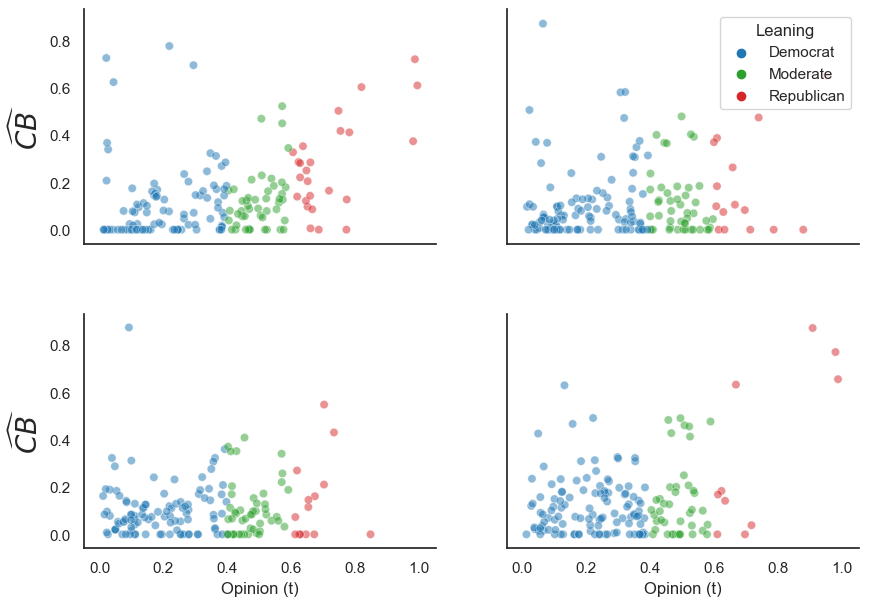

In [33]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharex=True, sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.scatterplot(data=tmp, x='opt', y = 'openMindedness', hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, alpha=0.5, ax=axes[i, j])    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    g.set_xlabel("Opinion (t)")
    # g.set_ylabel("% Users", fontsize = 15)
    # g.set_xlabel(r"Error (log)", fontsize = 15)
    # g.set_title(f'{timestamp}', fontsize = 15)
    # g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    # plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.3)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()

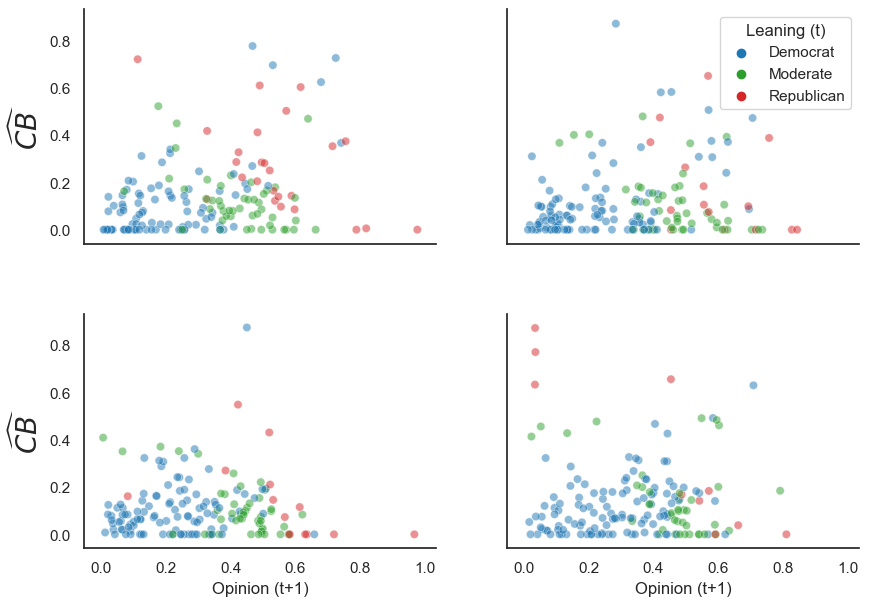

In [34]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharex=True, sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.scatterplot(data=tmp, x='opt1', y = 'openMindedness', hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, alpha=0.5, ax=axes[i, j])    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    g.set_xlabel("Opinion (t+1)")
    # g.set_ylabel("% Users", fontsize = 15)
    # g.set_xlabel(r"Error (log)", fontsize = 15)
    # g.set_title(f'{timestamp}', fontsize = 15)
    # g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    # plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.3)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning (t)")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()

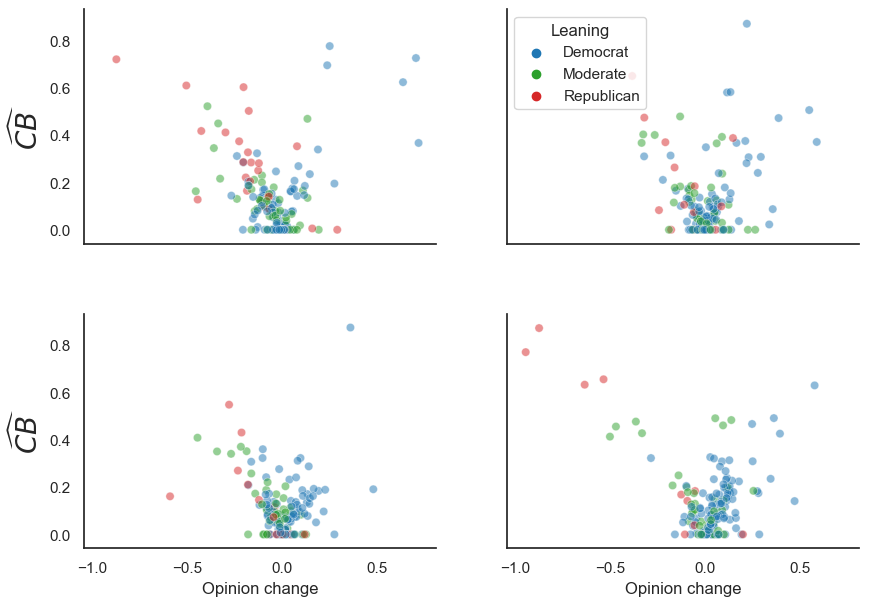

In [35]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharex=True, sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.scatterplot(data=tmp, x='opChange', y = 'openMindedness', hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, alpha=0.5, ax=axes[i, j])    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel(r"$\widehat{CB}$", fontsize = 20)
    g.set_xlabel("Opinion change")
    # g.set_ylabel("% Users", fontsize = 15)
    # g.set_xlabel(r"Error (log)", fontsize = 15)
    # g.set_title(f'{timestamp}', fontsize = 15)
    # g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    # plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.3)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()


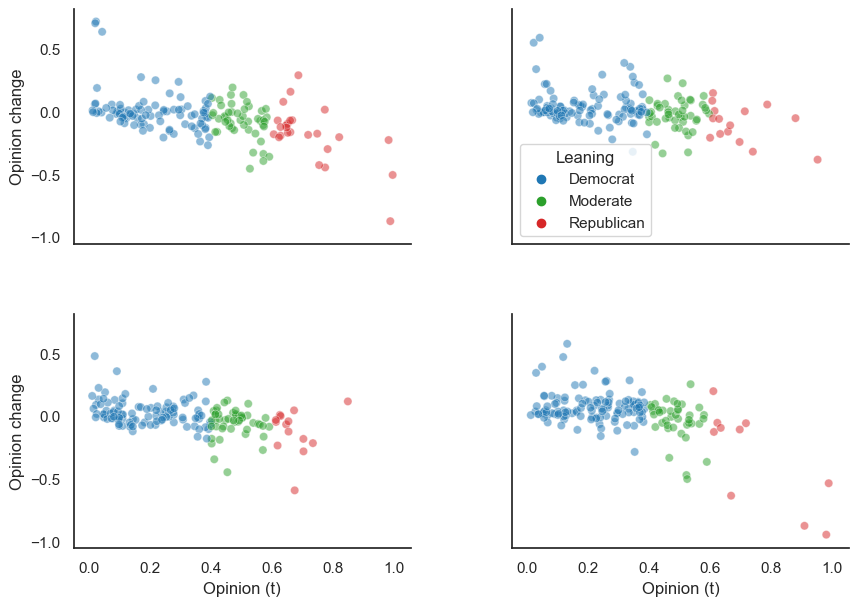

In [36]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharex=True, sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.scatterplot(data=tmp, x='opt', y = 'opChange', hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, alpha=0.5, ax=axes[i, j])    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel("Opinion change")
    g.set_xlabel("Opinion (t)")
    # g.set_ylabel("% Users", fontsize = 15)
    # g.set_xlabel(r"Error (log)", fontsize = 15)
    # g.set_title(f'{timestamp}', fontsize = 15)
    # g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    # plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()


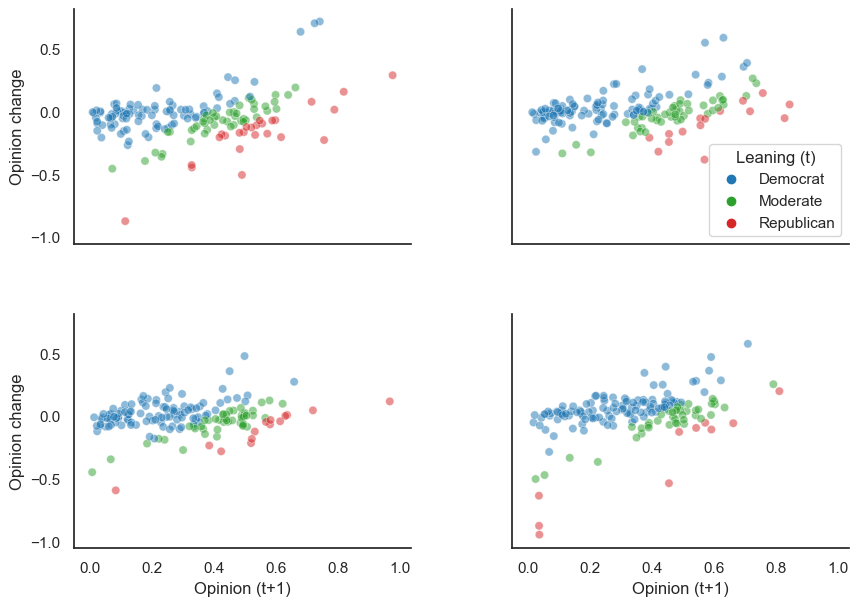

In [37]:
palette = {
    'Democrat': 'tab:blue',
    'Moderate': 'tab:green',
    'Republican': 'tab:red',
}
sns.set_style("white", rc={'axes.spines.right': False, 'axes.spines.top': False, 'figure.dpi':600, 'axes.xmargin': 0.15, 'xtick.labelsize': 'x-large'})
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7), sharex=True, sharey=True)
i = 0
j = 0
for timestamp in list(data.timestamp.unique()):
    tmp = data[data['timestamp']==timestamp]
    g = sns.scatterplot(data=tmp, x='opt1', y = 'opChange', hue='orientation', hue_order=['Democrat', 'Moderate', 'Republican'], palette=palette, alpha=0.5, ax=axes[i, j])    # g = sns.histplot(data=tmp, x='opt', kde=True, color='black', bins=30, ax=axes[i, j], stat='probability', common_norm=False, alpha=0.8)
    g.set_ylabel("Opinion change")
    g.set_xlabel("Opinion (t+1)")
    # g.set_ylabel("% Users", fontsize = 15)
    # g.set_xlabel(r"Error (log)", fontsize = 15)
    # g.set_title(f'{timestamp}', fontsize = 15)
    # g.set(xscale='log')
    # g.set_xticklabels(labels=[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
    # yticklabels = g.get_yticks()
    # g.set_yticklabels(labels = yticklabels, fontsize=15)
    # plt.setp(g.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(g.get_legend().get_title(), fontsize='15') # for legend text
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    if j < 1 or i > 0:
        g.legend_.remove()
    else:
        axes[i,j].legend_.set_title("Leaning (t)")
    j += 1
    if j % 2 == 0:
        i+=1
        j = 0
plt.show()
plt.close()